In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile
import sklearn
import cv2

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_folder = '/content/drive/MyDrive/Dataset/'
os.listdir(dataset_folder)

['Digital_English_Font.zip']

In [ ]:
# Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Dataset/Digital_English_Font.zip'

# Define the folder in Colab where you want to extract the files (inside the local /content/ folder)
extract_folder = '/content/'

# Make sure the extract folder exists, if not, create it
os.makedirs(extract_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Zip file extracted successfully to /content/extracted_data/!")

Zip file extracted successfully to /content/extracted_data/!


In [ ]:
!tar -xzf EnglishFnt.tgz
#Ini buat nge unzip file EnglishFnt.tgz , hasil unzip file nya yang English

In [ ]:
#Directory kita : /content/English/Fnt

In [ ]:
DATASET = '/content/English/Fnt'

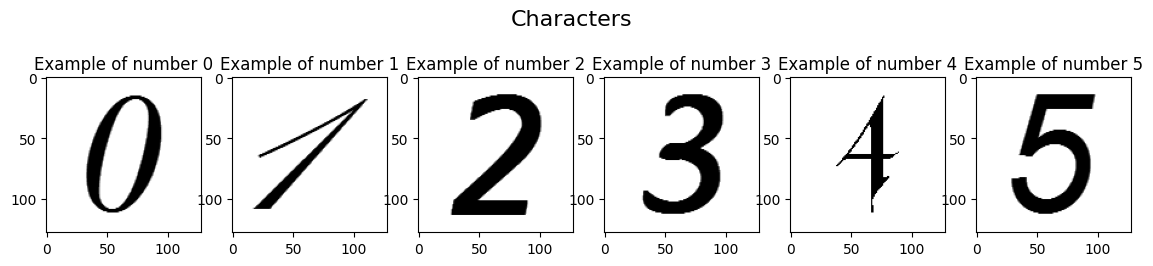

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Characters', fontsize=16)

# Plot one image from the first 4 letters
for ii, filesname in enumerate(['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006']):
    dir = f'/content/English/Fnt/{filesname}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of number {ii}')

#Kayaknya prefer ngerename folder yang ada foto2nya gasii? kayak misal folder Sample001 kan isinya foto dari angka 0 yaa
#Kita rename aja folder nya jadi 0. Tolong pendapatnya ya guys

In [ ]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")
sample_array[0,:5]

Each image has shape: (128, 128, 3)


array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]], dtype=float32)

In [ ]:
#Hyperparameter
BATCH_SIZE = 64
IMG_HEIGHT = 28
IMG_WIDTH = 28
LEARNING_RATE = 0.001
EPOCHS = 15

In [ ]:
def train_val_datasets():
    """Creates datasets for training and validation.

    Returns:
        (tf.data.Dataset, tf.data.Dataset): Training and validation datasets.
    """

    ### START CODE HERE ###

    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=DATASET,
        image_size=(IMG_HEIGHT,IMG_WIDTH),
        batch_size=BATCH_SIZE,
        label_mode='categorical',
        color_mode='grayscale',
        validation_split=0.1,
        subset='both',
        seed=42
    )

    ### END CODE HERE ###

    return training_dataset, validation_dataset

In [ ]:
list_label = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [ ]:
training_dataset, validation_dataset = train_val_datasets()

Found 62992 files belonging to 62 classes.
Using 56693 files for training.
Using 6299 files for validation.


In [ ]:
def rescale_image(image, label) :
  return image/255, label

In [ ]:
training_dataset = training_dataset.map(rescale_image)
validation_dataset = validation_dataset.map(rescale_image)

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomHeight, RandomWidth

# Define data augmentation layer
data_augmentation = tf.keras.Sequential([
    RandomRotation(0.1),         # Rotate up to 10%
    RandomZoom(0.1),             # Zoom in or out by up to 10%
    RandomHeight(0.1),           # Randomly adjust height by up to 10%
    RandomWidth(0.1)             # Randomly adjust width by up to 10%
])

# Apply augmentation only to the training set
augmented_training_dataset = training_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [ ]:
print(f"training dataset have shape: {type(training_dataset)}")
print(f"Images of training dataset have shape: {training_dataset.element_spec[0].shape}")
print(f"Labels of training dataset have shape: {training_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Labels of validation dataset have shape: {validation_dataset.element_spec[1].shape}")

training dataset have shape: <class 'tensorflow.python.data.ops.map_op._MapDataset'>
Images of training dataset have shape: (None, 28, 28, 1)
Labels of training dataset have shape: (None, 62)
Images of validation dataset have shape: (None, 28, 28, 1)
Labels of validation dataset have shape: (None, 62)


In [ ]:
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 1.0

Shape of batch of images: (64, 28, 28, 1)
Shape of batch of labels: (64, 62)


In [ ]:
# def create_model():
#     """Create the classifier model

#     Returns:
#         tf.keras.model.Sequential: CNN for multi-class classification
#     """
#     ### START CODE HERE ###

#     # Define the model
#     model = tf.keras.models.Sequential([
#         tf.keras.Input(shape=(28, 28, 1)),
#         tf.keras.layers.Rescaling(1./255),
#         tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#         tf.keras.layers.MaxPooling2D(2,2),
#         tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
#         tf.keras.layers.MaxPooling2D(2,2),
#         #tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
#         #tf.keras.layers.MaxPooling2D(),
#         #tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
#         #tf.keras.layers.MaxPooling2D(),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(128, activation = 'relu'),
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(62, activation='softmax')
#         ])

#     model.compile(optimizer = 'rmsprop',
#                   loss = 'categorical_crossentropy',
#                   metrics = ['accuracy'])

#     ### END CODE HERE ###
#     return model

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))

# Block 1
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

# Block 2
x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

# Block 3
x = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

# Additional Block 4 for depth
x = tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D()(x)

# Flatten and Dense layers with added dropout
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)  # Increased dropout
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(62, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with a learning rate schedule
initial_learning_rate = 0.001
# #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
# )
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Check input & Output shape
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')
# Summary of the updated model
model.summary()

Input shape: (None, 28, 28, 1)
Output shape: (None, 62)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,730,174 (6.60 MB)

 Trainable params: 1,728,254 (6.59 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (64, 62)


In [ ]:
len(training_dataset)

886

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)
]

In [ ]:
# Train your model
history = model.fit(training_dataset,
                    epochs=50,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 577s 647ms/step - accuracy: 0.4419 - loss: 2.1085 - val_accuracy: 0.8225 - val_loss: 0.4941 - learning_rate: 0.0010
Epoch 2/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 610s 633ms/step - accuracy: 0.7939 - loss: 0.5891 - val_accuracy: 0.8409 - val_loss: 0.4324 - learning_rate: 0.0010
Epoch 3/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 564s 637ms/step - accuracy: 0.8295 - loss: 0.4606 - val_accuracy: 0.8441 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 4/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 561s 633ms/step - accuracy: 0.8463 - loss: 0.4032 - val_accuracy: 0.8679 - val_loss: 0.3509 - learning_rate: 0.0010
Epoch 5/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 564s 636ms/step - accuracy: 0.8651 - loss: 0.3523 - val_accuracy: 0.8687 - val_loss: 0.3417 - learning_rate: 0.0010
Epoch 6/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 552s 623ms/step - accuracy: 0.8756 - loss: 0.3205 - val_accuracy: 0.8847 - val_loss: 0.2984 - learning_rate: 0.0010
Epoch 7/50
886/886 ━━━━━━━━━━━━━━━━━━━━ 553s 624ms/step - accura

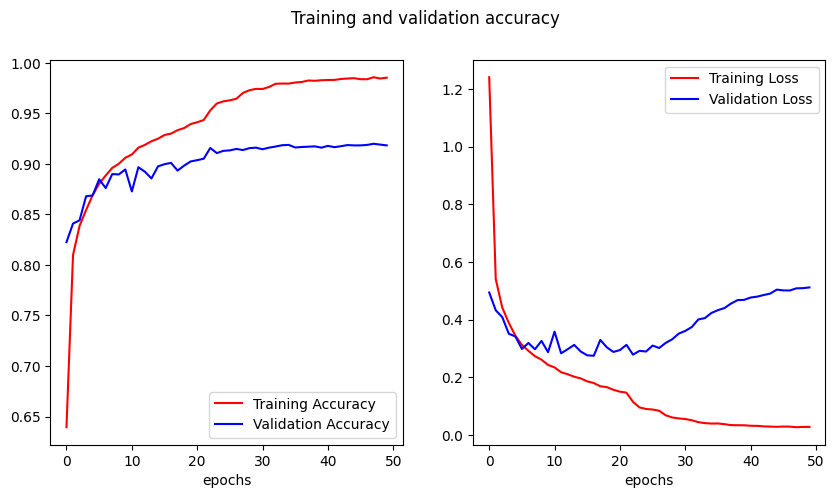

In [ ]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

(28, 28, 1)
(1, 28, 28, 1)
The photo is: O


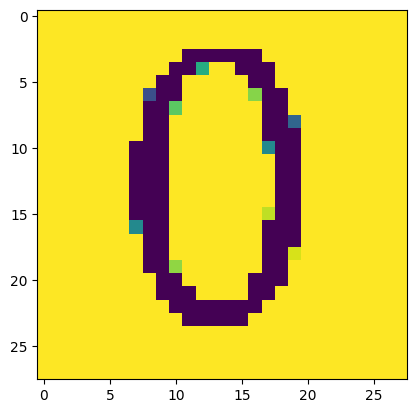

In [ ]:
image = tf.keras.utils.load_img('/content/Number_0.png', target_size=(28, 28), color_mode='grayscale')
image = tf.keras.utils.img_to_array(image)
image_arr=image/255
print(image_arr.shape)
image_arr = np.expand_dims(image_arr, axis=0)

print(image_arr.shape)
image_arr = tf.convert_to_tensor(image_arr, dtype=tf.float32)
prediction = model.predict(image_arr, verbose=False)
print(f'The photo is: {list_label[np.argmax(prediction)]}')
plt.imshow(image)

(28, 28, 1)
(1, 28, 28, 1)
The photo is: H


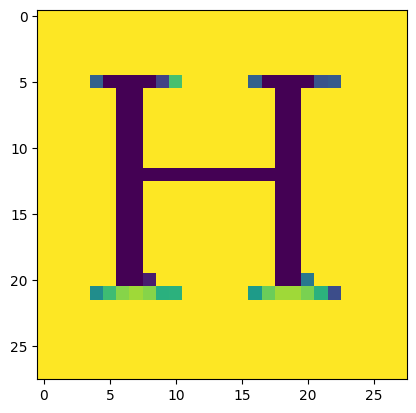

In [ ]:
image = tf.keras.utils.load_img('/content/Letter.png', target_size=(28, 28), color_mode='grayscale')
image = tf.keras.utils.img_to_array(image)
image_arr=image/255
print(image_arr.shape)
image_arr = np.expand_dims(image_arr, axis=0)

print(image_arr.shape)
image_arr = tf.convert_to_tensor(image_arr, dtype=tf.float32)
prediction = model.predict(image_arr, verbose=False)
print(f'The photo is: {list_label[np.argmax(prediction)]}')
plt.imshow(image)

(28, 28, 1)
(1, 28, 28, 1)
The photo is: 9


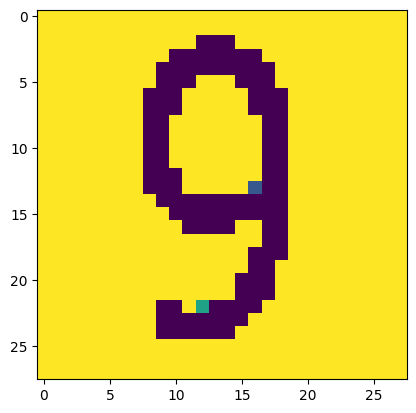

In [ ]:
image = tf.keras.utils.load_img('/content/number_9.png', target_size=(28, 28), color_mode='grayscale')
image = tf.keras.utils.img_to_array(image)
image_arr=image/255
print(image_arr.shape)
image_arr = np.expand_dims(image_arr, axis=0)

print(image_arr.shape)
image_arr = tf.convert_to_tensor(image_arr, dtype=tf.float32)
prediction = model.predict(image_arr, verbose=False)
print(f'The photo is: {list_label[np.argmax(prediction)]}')
plt.imshow(image)

In [ ]:
model.save('my_model_1.keras')

In [ ]:
model.save_weights('my_model_1.weights.h5')

In [ ]:
from google.colab.patches import cv2_imshow

[INFO] Loading handwriting OCR model...


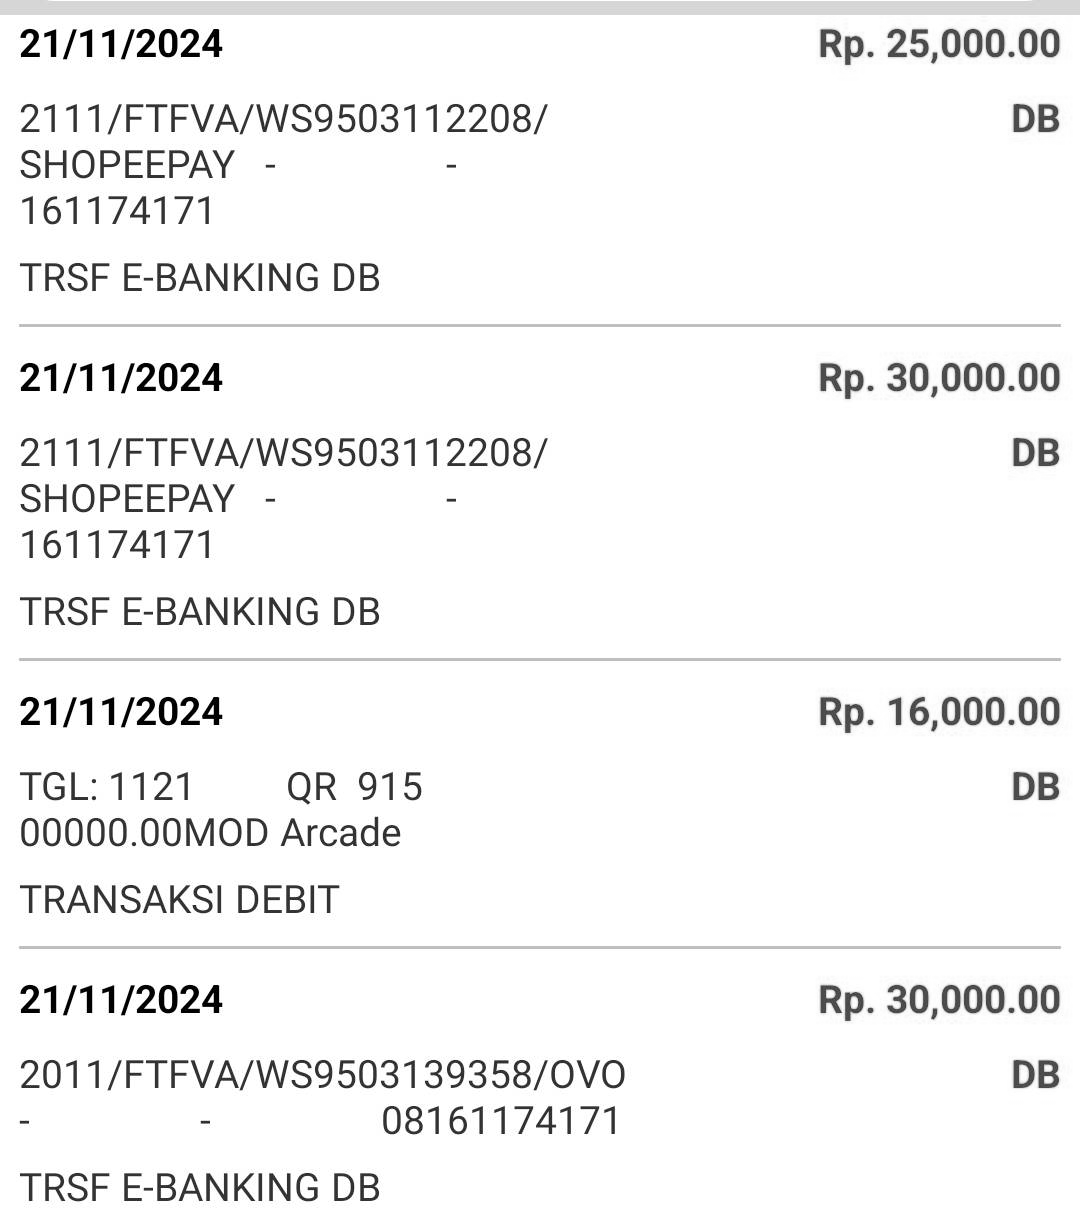

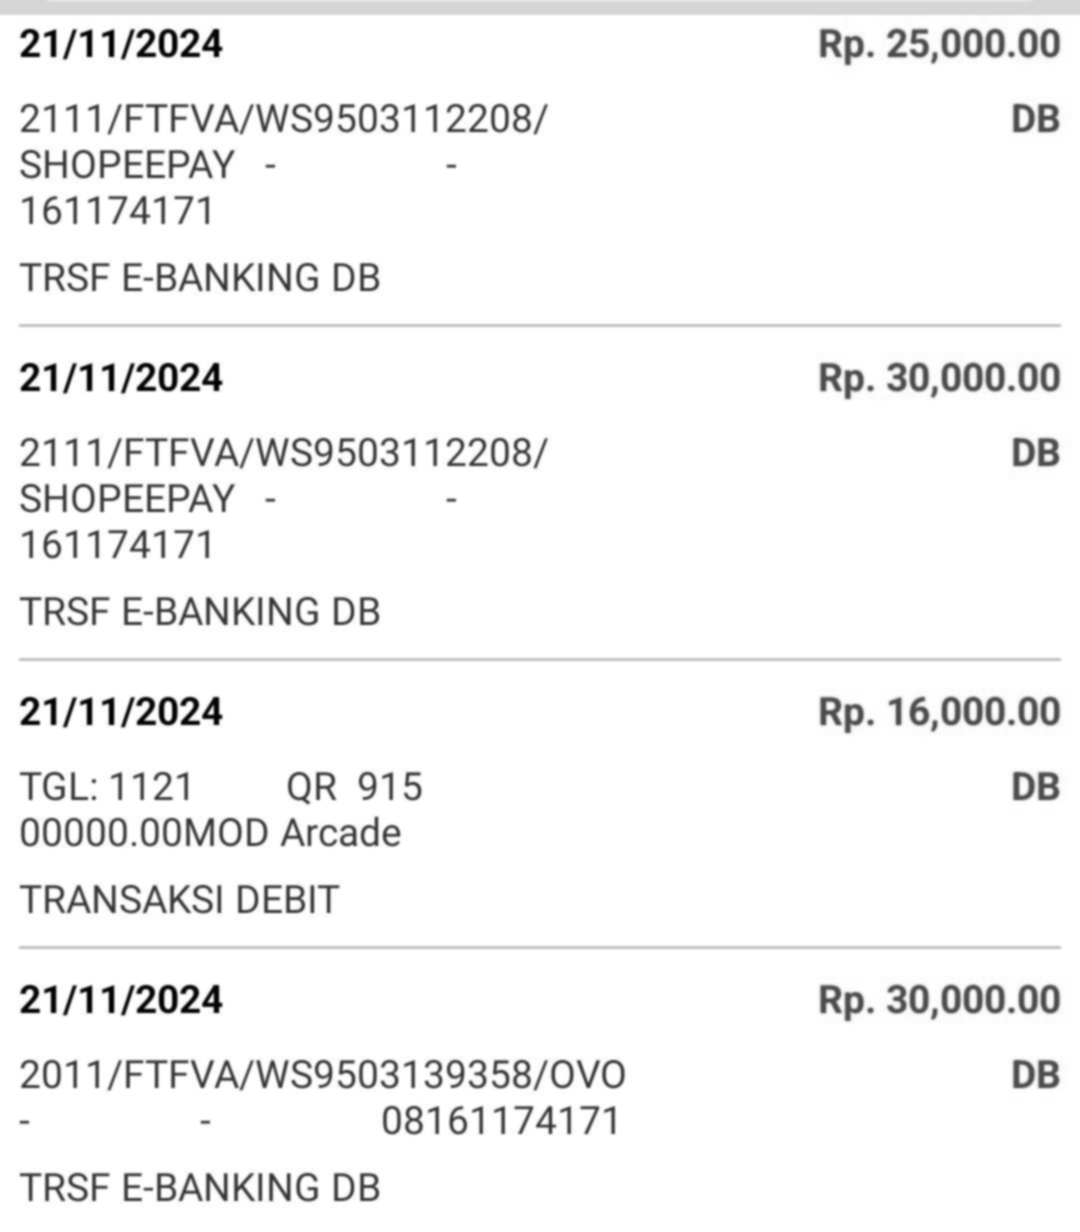

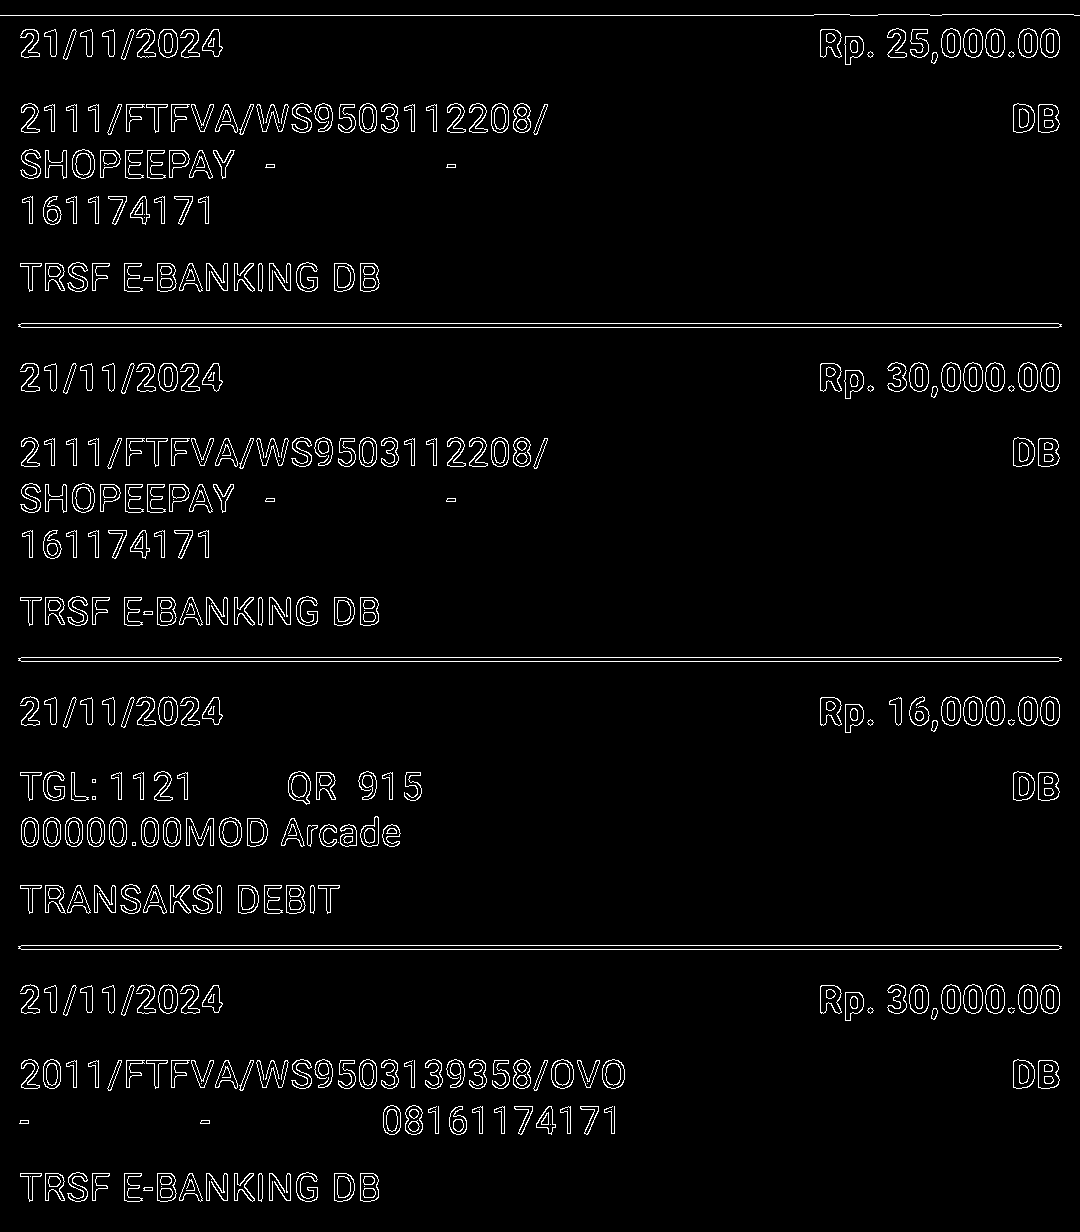

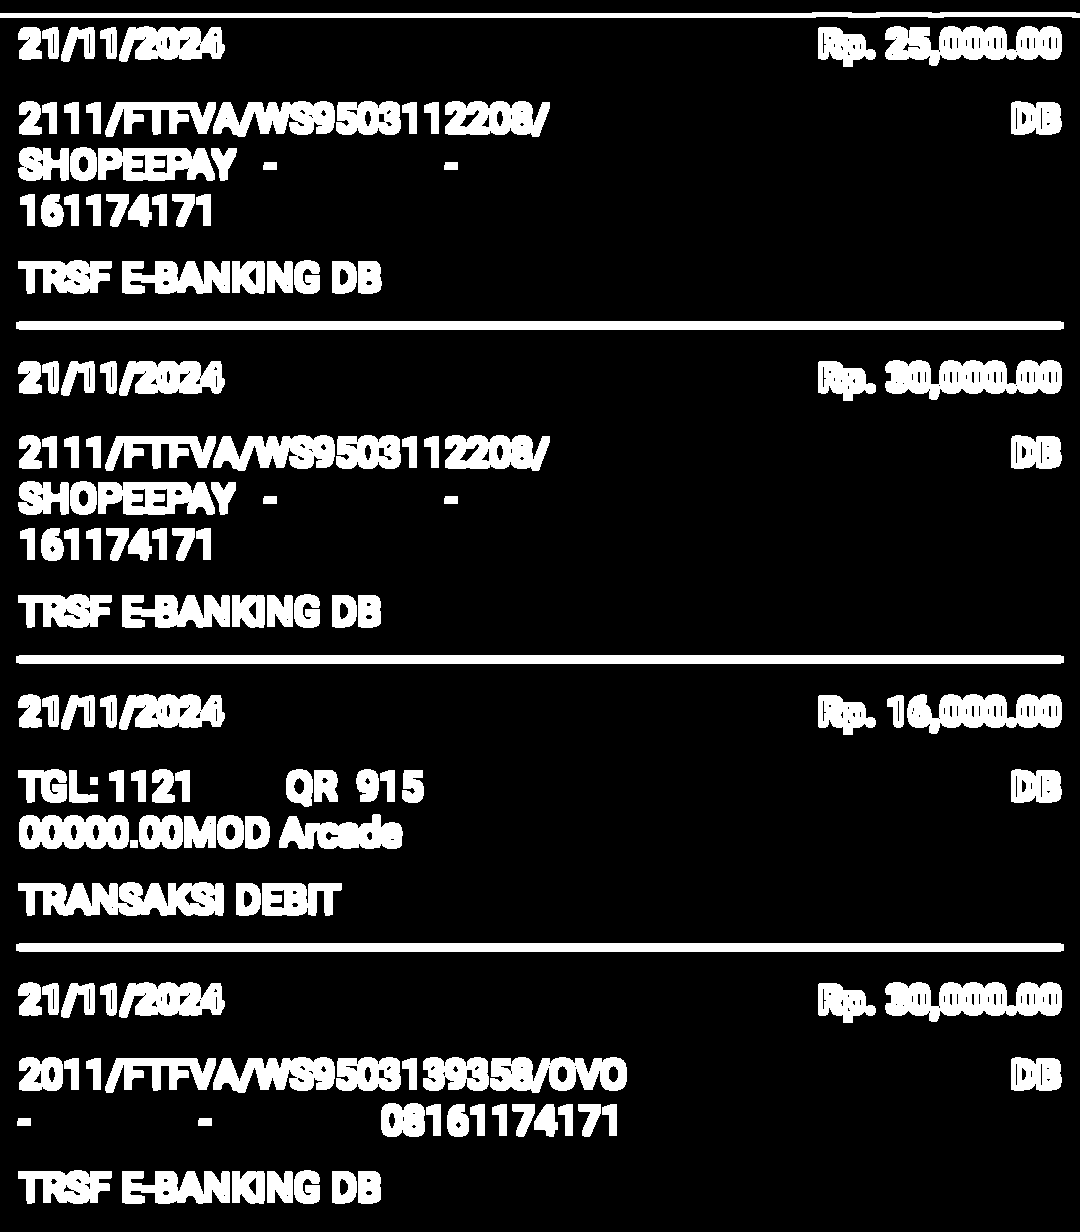

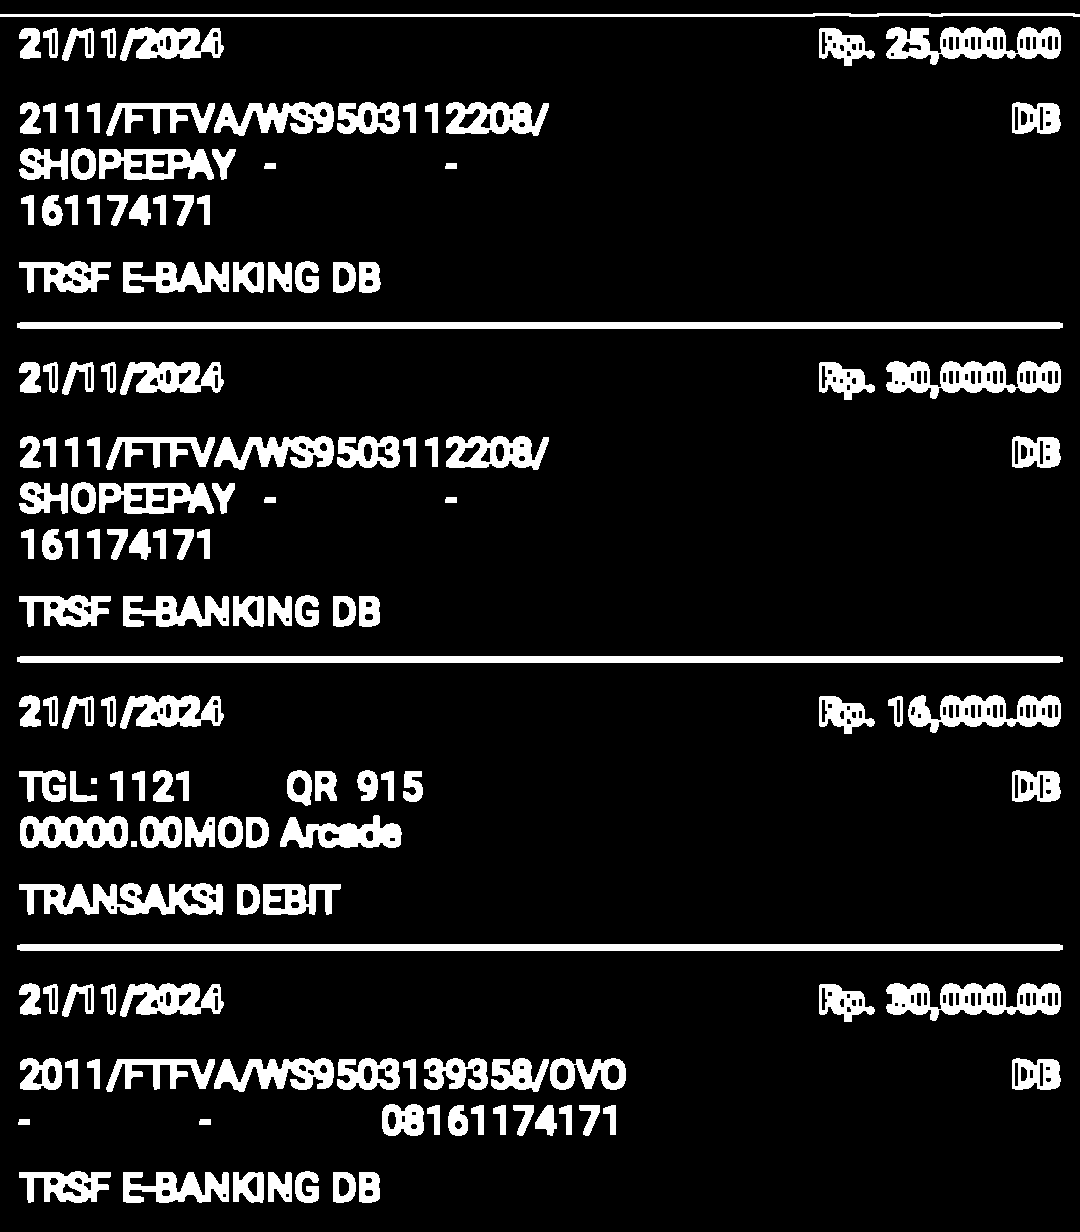

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step
[INFO] T - 99.72%
[INFO] 2 - 100.00%
[INFO] T - 99.72%
[INFO] T - 99.71%
[INFO] 2 - 100.00%
[INFO] T - 99.72%
[INFO] s - 99.74%
[INFO] 2 - 100.00%
[INFO] T - 99.75%
[INFO] s - 99.73%
[INFO] 2 - 99.98%
[INFO] 2 - 99.96%
[INFO] 0 - 95.45%
[INFO] 2 - 99.92%
[INFO] 2 - 99.98%
[INFO] 7 - 100.00%
[INFO] 7 - 100.00%
[INFO] 0 - 93.46%
[INFO] 0 - 96.03%
[INFO] G - 100.00%
[INFO] 6 - 100.00%
[INFO] 6 - 100.00%
[INFO] 7 - 59.51%
[INFO] 7 - 59.51%
[INFO] 7 - 100.00%
[INFO] 1 - 100.00%
[INFO] 7 - 100.00%
[INFO] 1 - 89.55%
[INFO] R - 100.00%
[INFO] R - 100.00%
[INFO] R - 100.00%
[INFO] H - 99.72%
[INFO] R - 100.00%
[INFO] H - 99.48%
[INFO] I - 91.05%
[INFO] I - 91.05%
[INFO] I - 89.32%
[INFO] I - 71.85%
[INFO] 0 - 92.21%
[INFO] 7 - 100.00%
[INFO] 7 - 100.00%
[INFO] 7 - 100.00%
[INFO] 7 - 100.00%
[INFO] 7 - 100.00%
[INFO] s - 99.46%
[INFO] A - 99.58%
[INFO] s - 99.46%
[INFO] s - 99.77%
[INFO] L - 99.96%
[INFO] O - 99.18%
[INFO] O - 99.89%
[INFO] 7 - 100.00%
[I

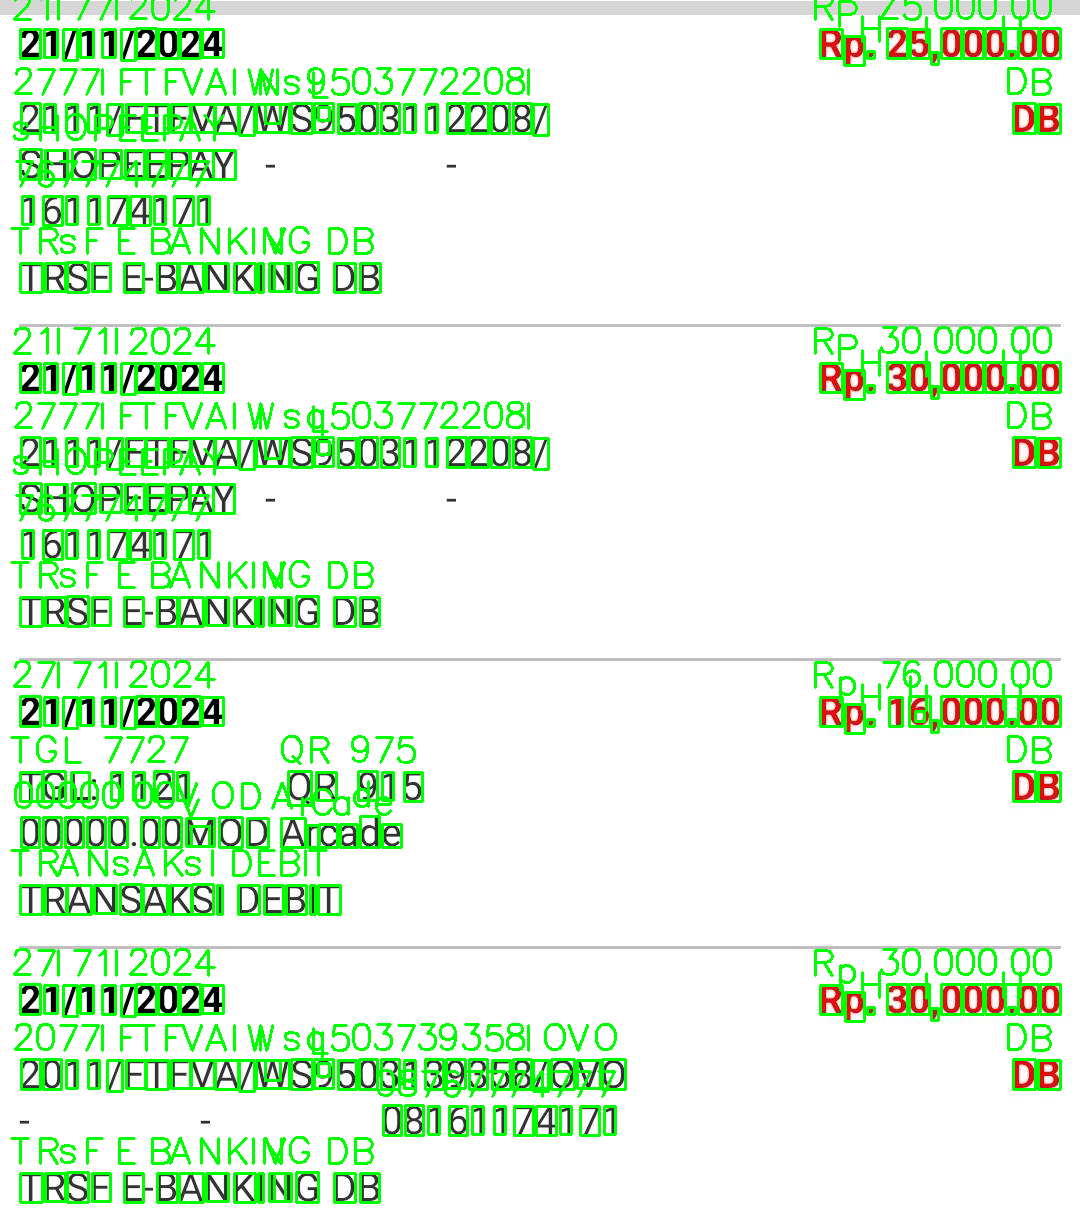

In [ ]:
# Import necessary packages
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from imutils.contours import sort_contours
import numpy as np
import imutils
import cv2

img_path = 'Mutasiku.jpg'
model_path = 'my_model_1.keras'
print("[INFO] Loading handwriting OCR model...")
model = load_model(model_path)

# Define the correct label mapping
labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
labelNames = [l for l in labelNames]

# Load the input image, convert to grayscale, and blur to reduce noise
image = cv2.imread(img_path)
#image = cv2.resize(image, (100, 100))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)  # Display grayscale image for debugging

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred)  # Display blurred image for debugging

# Perform edge detection
edged = cv2.Canny(blurred, 50, 100)
cv2_imshow(edged)  # Display edge-detected image for debugging

# Apply dilation and erosion to separate close contours
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(edged, kernel, iterations=2)
cv2_imshow(dilated)  # Display dilated image for debugging
eroded = cv2.erode(dilated, kernel, iterations=1)
cv2_imshow(eroded)  # Display eroded image for debugging

# Find contours and sort them from left-to-right
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# print(cnts)
# Initialize the list for character bounding boxes and characters to be OCR'd
chars = []

# Loop over each contour
for c in cnts:
    # Compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Filter out bounding boxes that are too small or too large (adjust this as needed)
    if (w >= 5 and w <= 100) and (h >= 5 and h <= 100):  # Adjusted min size
        # Extract the character ROI
        roi = gray[y:y + h, x:x + w]

        # Resize the character ROI to 28x28 while maintaining aspect ratio
        (tH, tW) = roi.shape
        if tW > tH:
            roi = imutils.resize(roi, width=28)
        else:
            roi = imutils.resize(roi, height=28)

        # Compute padding to ensure the image is 28x28
        (tH, tW) = roi.shape
        dX = (28 - tW) // 2
        dY = (28 - tH) // 2

        # Pad the image with white (255) background to make it 28x28
        padded = cv2.copyMakeBorder(roi, top=dY, bottom=dY, left=dX, right=dX,
                                    borderType=cv2.BORDER_CONSTANT, value=(255, 255, 255))

        # Ensure the final character image is 28x28
        padded = cv2.resize(padded, (28, 28))

        # Prepare the padded image for classification
        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)

        # Display each preprocessed character for debugging
        cv2_imshow((padded * 255).astype("uint8"))
        cv2.waitKey(0)

        # Update our list of characters that will be OCR'd
        chars.append((padded, (x, y, w, h)))

# Ensure there are detected characters to predict
if len(chars) == 0:
    print("[ERROR] No characters detected. Check preprocessing steps.")
else:
    # Extract the bounding box locations and padded characters
    boxes = [b[1] for b in chars]
    chars = np.array([c[0] for c in chars], dtype="float32")

    # OCR the characters using our handwriting recognition model
    preds = model.predict(chars)

    # Initialize a variable to hold the recognized text
    recognized_text = ""

    # Loop over predictions and bounding box locations together
    for (pred, (x, y, w, h)) in zip(preds, boxes):
        # Find the index of the label with the largest probability
        i = np.argmax(pred)
        prob = pred[i]
        label = labelNames[i]

        # Draw the prediction on the image
        print("[INFO] {} - {:.2f}%".format(label, prob * 100))
        recognized_text += label
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x - 10, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

    # Show the final annotated image with recognized text
    print("Recognized Text:", recognized_text)
    cv2_imshow(image)
    cv2.waitKey(0)


In [ ]:
from flask import Flask, render_template, request
import numpy as np
import os
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model("my_model.h5")
print("model is loaded")

app = Flask(__name__)
@app.route("/", methods=['GET', 'POST'])
def home():
    return render_template('index.html')


@app.route("/predict", methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        file = request.files['image']
        filename = file.filename
        file_path = os.path.join('static/user uploaded', filename)
        file.save(file_path)
        test_image = tf.keras.preprocessing.image.load_img(file_path)
        src = cv2.imread(file_path)
        print(src)
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edged = cv2.Canny(blurred, 30, 150)
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = sort_contours(cnts, method="left-to-right")[0]
        chars = []
        for c in cnts:
            # compute the bounding box of the contour
            (x, y, w, h) = cv2.boundingRect(c)
            # filter out bounding boxes, ensuring they are neither too small
            # nor too large
            if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
                # extract the character and threshold it to make the character
                # appear as *white* (foreground) on a *black* background, then
                # grab the width and height of the thresholded image
                roi = gray[y:y + h, x:x + w]
                thresh = cv2.threshold(roi, 0, 255,
                                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
                (tH, tW) = thresh.shape
                # if the width is greater than the height, resize along the
                # width dimension
                if tW > tH:
                    thresh = imutils.resize(thresh, width=32)
                # otherwise, resize along the height
                else:
                    thresh = imutils.resize(thresh, height=32)
                # re-grab the image dimensions (now that its been resized)
                # and then determine how much we need to pad the width and
                # height such that our image will be 32x32
                (tH, tW) = thresh.shape
                dX = int(max(0, 32 - tW) / 2.0)
                dY = int(max(0, 32 - tH) / 2.0)
                # pad the image and force 32x32 dimensions
                padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
                                            left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
                                            value=(0, 0, 0))
                padded = cv2.resize(padded, (28, 28))
                # prepare the padded image for classification via our
                # handwriting OCR model
                padded = padded.astype("float32") / 255.0
                padded = np.expand_dims(padded, axis=-1)
                # update our list of characters that will be OCR'd
                chars.append((padded, (x, y, w, h)))
        boxes = [b[1] for b in chars]
        chars = np.array([c[0] for c in chars], dtype="float32")
        # OCR the characters using our handwriting recognition model
        preds = model.predict(chars)
        # define the list of label names
        labelNames = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
        labelNames = [l for l in labelNames]

        output = ""
        for (pred, (x, y, w, h)) in zip(preds, boxes):
            i = np.argmax(pred)
            prob = pred[i]
            label = labelNames[i]
            output += label

        print("output",output)

        return render_template('sec.html', pred_output=output, user_image=file_path)

if __name__ == "__main__":
    app.run(threaded=False)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# image = tf.keras.utils.load_img('/content/Number_0.png', target_size=(28, 28), color_mode='grayscale')
# image = tf.keras.utils.img_to_array(image)
# image = image / 255.0
# print("Original image shape:", image.shape)

# # Normalize and expand dimensions
# image = image / 255.0
# image = np.expand_dims(image, axis=0)  # Now image.shape should be (1, 28, 28, 1)
# print("After processing image shape:", image.shape)

# # Make prediction
# prediction = model.predict(image, verbose=False)
# print(f'The photo is: {list_label[np.argmax(prediction)]}')

# # Display the image
# plt.imshow(image[0, ..., 0], cmap='gray')  # Use only the first channel for grayscale images
# plt.show()

In [ ]:
!pip install imutils

In [ ]:
import imutils

In [ ]:
def sort_contours(bounding_boxes, method="left-to-right"):
    """Sort bounding boxes based on the specified method.

    Args:
        bounding_boxes: A list of bounding boxes, each represented as a tuple (x, y, w, h).
        method: The sorting method to use. Can be "left-to-right", "right-to-left",
                "top-to-bottom", or "bottom-to-top". Defaults to "left-to-right".

    Returns:
        A sorted list of bounding boxes.
    """
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom, sorting by the y-coordinate of the bounding box
    boundingBoxes = sorted(bounding_boxes, key=lambda b: b[i], reverse=reverse)
    # return the list of sorted bounding boxes
    return boundingBoxes

In [ ]:
from PIL import Image, ImageOps
import numpy as np
from scipy import ndimage
from skimage import measure
import tensorflow as tf

def get_letters(image_path, model, list_label):
    letters = []

    # Load the full image, convert to grayscale, and invert colors for easier letter detection
    full_image = Image.open(image_path).convert('L')
    inverted_image = ImageOps.invert(full_image)  # Invert so text is white on black background
    binary_image = (np.array(inverted_image) > 127).astype(np.uint8) * 255  # Binarize

    # Find connected components to detect individual letters
    labeled, num_labels = ndimage.label(binary_image)
    objects = ndimage.find_objects(labeled)

    # Process each detected letter
    for obj_slice in objects:
        if obj_slice:
            # Extract each letter region using slices
            (y, x, h, w) = obj_slice[0].start, obj_slice[1].start, obj_slice[0].stop, obj_slice[1].stop
            letter_region = full_image.crop((x, y, w, h))

            # Resize each letter region to the model's expected input size
            letter_region = letter_region.resize((28, 28), Image.Resampling.BICUBIC)

            # Convert letter region to array format for prediction
            letter_array = tf.keras.utils.img_to_array(letter_region)
            letter_array = np.expand_dims(letter_array, axis=0)  # Add batch dimension

            # Make a prediction
            prediction = model.predict(letter_array, verbose=False)
            predicted_label = list_label[np.argmax(prediction)]
            letters.append(predicted_label)

    return letters

In [ ]:
letter = get_letters("/content/SMILE.png", model, list_label)
word = get_word(letter)
print(word)

NameError: name 'get_word' is not defined

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import os
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
import tensorflow as tf
from tensorflow import keras

app = Flask(__name__)
@app.route("/", methods=['GET', 'POST'])
def home():
    return render_template('index.html')


@app.route("/predict", methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        file = request.files['image']
        filename = file.filename
        file_path = os.path.join('static/user uploaded', filename)
        file.save(file_path)
        test_image = tf.keras.preprocessing.image.load_img(file_path)
        src = cv2.imread(file_path)
        print(src)
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edged = cv2.Canny(blurred, 30, 150)
        cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        cnts = sort_contours(cnts, method="left-to-right")[0]
        chars = []
        for c in cnts:
            # compute the bounding box of the contour
            (x, y, w, h) = cv2.boundingRect(c)
            # filter out bounding boxes, ensuring they are neither too small
            # nor too large
            if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
                # extract the character and threshold it to make the character
                # appear as *white* (foreground) on a *black* background, then
                # grab the width and height of the thresholded image
                roi = gray[y:y + h, x:x + w]
                thresh = cv2.threshold(roi, 0, 255,
                                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
                (tH, tW) = thresh.shape
                # if the width is greater than the height, resize along the
                # width dimension
                if tW > tH:
                    thresh = imutils.resize(thresh, width=32)
                # otherwise, resize along the height
                else:
                    thresh = imutils.resize(thresh, height=32)
                # re-grab the image dimensions (now that its been resized)
                # and then determine how much we need to pad the width and
                # height such that our image will be 32x32
                (tH, tW) = thresh.shape
                dX = int(max(0, 32 - tW) / 2.0)
                dY = int(max(0, 32 - tH) / 2.0)
                # pad the image and force 32x32 dimensions
                padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
                                            left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
                                            value=(0, 0, 0))
                padded = cv2.resize(padded, (32, 32))
                # prepare the padded image for classification via our
                # handwriting OCR model
                padded = padded.astype("float32") / 255.0
                padded = np.expand_dims(padded, axis=-1)
                # update our list of characters that will be OCR'd
                chars.append((padded, (x, y, w, h)))
        boxes = [b[1] for b in chars]
        chars = np.array([c[0] for c in chars], dtype="float32")
        # OCR the characters using our handwriting recognition model
        preds = model.predict(chars)
        # define the list of label names
        labelNames = "0123456789"
        labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        labelNames = [l for l in labelNames]

        output = ""
        for (pred, (x, y, w, h)) in zip(preds, boxes):
            i = np.argmax(pred)
            prob = pred[i]
            label = labelNames[i]
            output += label

        print("output",output)

        return render_template('sec.html', pred_output=output, user_image=file_path)

if __name__ == "__main__":
    app.run(threaded=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
def Get_Letters(image_path) :
  test_image = tf.keras.preprocessing.image.load_img(image_path)
  src = cv2.imread(image_path)
  #print(src)
  gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  edged = cv2.Canny(blurred, 30, 150)
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sort_contours(cnts, method="left-to-right")[0]
  chars = []
  for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,
                                       cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape
        # if the width is greater than the height, resize along the
        # width dimension
        if tW > tH:
            thresh = imutils.resize(thresh, width=32)
        # otherwise, resize along the height
        else:
            thresh = imutils.resize(thresh, height=32)
        # re-grab the image dimensions (now that its been resized)
        # and then determine how much we need to pad the width and
        # height such that our image will be 32x32
        (tH, tW) = thresh.shape
        dX = int(max(0, 32 - tW) / 2.0)
        dY = int(max(0, 32 - tH) / 2.0)
        # pad the image and force 32x32 dimensions
        padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
                                    left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
                                    value=(0, 0, 0))
        padded = cv2.resize(padded, (28, 28))
        # prepare the padded image for classification via our
        # handwriting OCR model
        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)
        # update our list of characters that will be OCR'd
        chars.append((padded, (x, y, w, h)))
    boxes = [b[1] for b in chars]
    chars = np.array([c[0] for c in chars], dtype="float32")
        # OCR the characters using our handwriting recognition model
    preds = model.predict(chars)

    output = ""
    for (pred, (x, y, w, h)) in zip(preds, boxes):
        i = np.argmax(pred)
        prob = pred[i]
        label = list_label[i]
        output += label
    return output

In [ ]:
def get_word(letter):
    word = "".join(letter)
    return word

In [ ]:
letter = Get_Letters("/content/SMILE.png")
word = get_word(letter)
print(word)

KeyboardInterrupt: 

KeyboardInterrupt: 